# Project 3: Build and Train Various ML Models

This project will use the cleaned data from the proj_3_prepocessing file to build 5 different ML models. 
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Cleaned data from the wellbeing and lifestyle kaggle dataset
data = pd.read_csv("data_clean.csv") # Unscaled
# Cleaned training, validation, and test data from same dataset
train_data = pd.read_csv("data_train.csv")
val_data = pd.read_csv("data_val.csv")
test_data = pd.read_csv("data_test.csv")

# Logistic Regression 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the datasets
X_train = train_data.drop(['GENDER_Female', 'GENDER_Male'], axis=1)
y_train = train_data['GENDER_Male']
X_val = val_data.drop(['GENDER_Female', 'GENDER_Male'], axis=1)
y_val = val_data['GENDER_Male']
X_test = test_data.drop(['GENDER_Female', 'GENDER_Male'], axis=1)
y_test = test_data['GENDER_Male']

# Initialize and train the logistic regression model
max_iter_val = 5000
# Adjusting the hyperparameters to what gave the highest found accuracy (based on cell below)
log_reg = LogisticRegression(max_iter=max_iter_val)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy}")
print("Confusion Matrix:\n", val_conf_matrix)

Training Accuracy: 0.6669797537048633
Validation Accuracy: 0.6651017214397497
Confusion Matrix:
 [[1701  264]
 [ 806  424]]


Going to see if changing the regularization value (C) to different values as well as if changing the penalty will do anything in highering the accuracy of the model. 

In [12]:
from sklearn.metrics import accuracy_score

# Trying out different hyperparameters
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2', 'elasticnet', 'none']
best_accuracy = 0
best_params = {'C': None, 'penalty': None}

for penalty in penalties:
    # Skip invalid solver/penalty combinations
    if penalty == 'elasticnet':
        solver = 'saga' 
    else:
        solver = 'liblinear' 
    
    for C in C_values:
        # Initialize the Logistic Regression model with current parameters
        if penalty == 'elasticnet':
            model = LogisticRegression(C=C, penalty=penalty, l1_ratio=0.5, solver=solver, max_iter=1000)
        else:
            model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
        
        # Fitting the model on training data and predicting on validation data
        try:
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            accuracy = accuracy_score(y_val, y_val_pred)
            
            # printing performance and update the best parameters
            print(f"Penalty: {penalty}, C: {C}, Accuracy: {accuracy}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params['C'] = C
                best_params['penalty'] = penalty
        except Exception as e:
            # This block catches errors which might arise from invalid parameter combinations.
            print(f"Could not train model with Penalty: {penalty}, C: {C}. Error: {str(e)}")

best_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='saga' if best_params['penalty'] == 'elasticnet' else 'liblinear', max_iter=1000)
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"SVM Training Accuracy: {train_accuracy}")
# Print out the best parameters and best accuracy found
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")

Penalty: l1, C: 0.001, Accuracy: 0.6150234741784038
Penalty: l1, C: 0.01, Accuracy: 0.6613458528951487
Penalty: l1, C: 0.1, Accuracy: 0.6613458528951487
Penalty: l1, C: 1, Accuracy: 0.6644757433489827
Penalty: l1, C: 10, Accuracy: 0.6651017214397497
Penalty: l1, C: 100, Accuracy: 0.6651017214397497
Penalty: l2, C: 0.001, Accuracy: 0.6629107981220658
Penalty: l2, C: 0.01, Accuracy: 0.6632237871674491
Penalty: l2, C: 0.1, Accuracy: 0.6644757433489827
Penalty: l2, C: 1, Accuracy: 0.6651017214397497
Penalty: l2, C: 10, Accuracy: 0.6651017214397497
Penalty: l2, C: 100, Accuracy: 0.6651017214397497
Penalty: elasticnet, C: 0.001, Accuracy: 0.6150234741784038
Penalty: elasticnet, C: 0.01, Accuracy: 0.662284820031299
Penalty: elasticnet, C: 0.1, Accuracy: 0.6632237871674491
Penalty: elasticnet, C: 1, Accuracy: 0.6647887323943662
Penalty: elasticnet, C: 10, Accuracy: 0.6651017214397497


/Users/madmax11/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: elasticnet, C: 100, Accuracy: 0.6651017214397497
Could not train model with Penalty: none, C: 0.001. Error: penalty='none' is not supported for the liblinear solver
Could not train model with Penalty: none, C: 0.01. Error: penalty='none' is not supported for the liblinear solver
Could not train model with Penalty: none, C: 0.1. Error: penalty='none' is not supported for the liblinear solver
Could not train model with Penalty: none, C: 1. Error: penalty='none' is not supported for the liblinear solver
Could not train model with Penalty: none, C: 10. Error: penalty='none' is not supported for the liblinear solver
Could not train model with Penalty: none, C: 100. Error: penalty='none' is not supported for the liblinear solver
SVM Training Accuracy: 0.6669797537048633
Best parameters: {'C': 10, 'penalty': 'l1'}
Best validation accuracy: 0.6651017214397497


Tuning the Logistic Regression models parameters seemed to make no difference from the default parameters in original model even though the penalty, C value, and solver are different. This could be due to the nature of the dataset, possibly not being complex enough, which would result in the logistic model plateauing regardless of the parameter changes. 

Test Accuracy: 0.6651017214397497
Confusion Matrix:
 [[1701  264]
 [ 806  424]]


Text(0.5, 1.0, 'Confusion Matrix for Test Data')

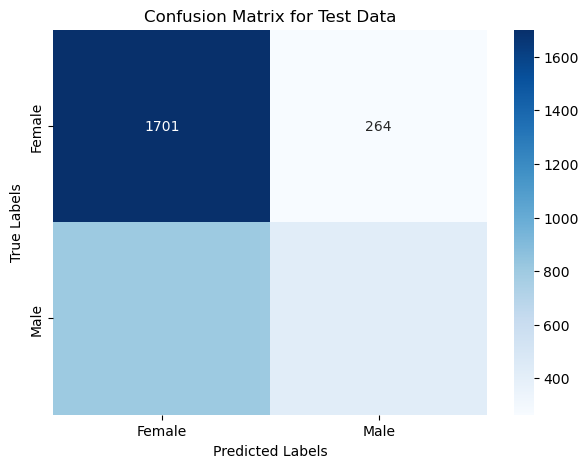

In [18]:
#Optimized model with new best found hyper parameters
log_reg_optimized = LogisticRegression(max_iter=5000, C=10, penalty='l1', solver = 'saga')
log_reg_optimized.fit(X_train, y_train)

#Prediction on test set
y_test_pred = log_reg_optimized.predict(X_test)

# Evaluate the model on the validation set
test_accuracy = accuracy_score(y_val, y_val_pred)
test_conf_matrix = confusion_matrix(y_val, y_val_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:\n", test_conf_matrix)

plt.figure(figsize=(7, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')

# 2. Support Vector Machine 

In [19]:
from sklearn.svm import SVC

In [20]:
# Training model and checking different hyperparameters 
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0)
    if kernel == 'poly':
        svm_model.degree = 3 
    svm_model.fit(X_train, y_train)
    y_val_pred = svm_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy with {kernel} kernel: {val_accuracy}')

Validation Accuracy with linear kernel: 0.6528951486697966
Validation Accuracy with rbf kernel: 0.6666666666666666
Validation Accuracy with poly kernel: 0.6519561815336463


Test Accuracy: 0.6685446009389672
Confusion Matrix for test data:
 [[1737  198]
 [ 861  399]]


Text(0.5, 1.0, 'Confusion Matrix for SVM on Test Data')

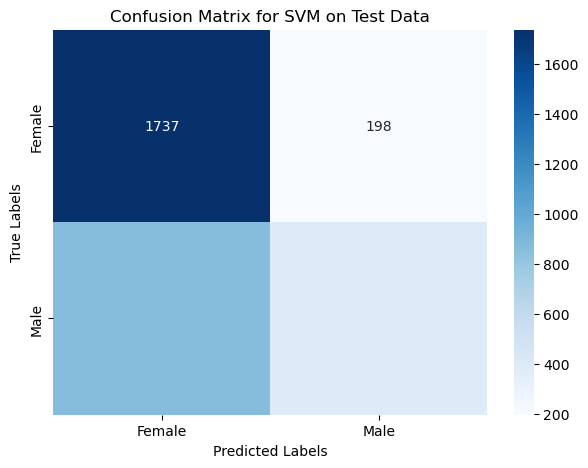

In [21]:
#Optimized model 
svm_optimized_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_optimized_model.fit(X_train, y_train)

y_test_pred = svm_optimized_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix for test data:\n", test_conf_matrix)

plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM on Test Data')

# 3. Decision Trees

In [26]:
age_columns = ['AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20']

for df in [train_data, val_data, test_data]:
    conditions = [
        df['AGE_21 to 35'] == 1,
        df['AGE_36 to 50'] == 1,
        df['AGE_51 or more'] == 1,
        df['AGE_Less than 20'] == 1
    ]
    # The choices must correspond one-to-one with the conditions
    choices = ['21-35', '36-50', '51+', '<20']
    df['age_group'] = np.select(conditions, choices, default='Unknown')

# Now, prepare your feature and target datasets
X_train = train_data.drop(age_columns + ['age_group'], axis=1)
y_train = train_data['age_group']
X_val = val_data.drop(age_columns + ['age_group'], axis=1)
y_val = val_data['age_group']
X_test = test_data.drop(age_columns + ['age_group'], axis=1)
y_test = test_data['age_group']

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt_classifier = DecisionTreeClassifier(random_state=11)
dt_classifier.fit(X_train, y_train)

y_val_pred = dt_classifier.predict(X_val)

y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print("Confusion Matrix:\n", val_conf_matrix)
print("Classification Report:\n", val_class_report)

# This takes about 2 minutes
# plt.figure(figsize=(20,10))
# plot_tree(dt_classifier, feature_names=X_train.columns, class_names=age_groups, filled=True, rounded=True)

Training Accuracy: 0.9996869129618033
Validation Accuracy: 0.38059467918622847
Confusion Matrix:
 [[557 340 200 142]
 [287 329 194  88]
 [202 205 241  53]
 [127  82  59  89]]
Classification Report:
               precision    recall  f1-score   support

       21-35       0.47      0.45      0.46      1239
       36-50       0.34      0.37      0.35       898
         51+       0.35      0.34      0.35       701
         <20       0.24      0.25      0.24       357

    accuracy                           0.38      3195
   macro avg       0.35      0.35      0.35      3195
weighted avg       0.38      0.38      0.38      3195



In [28]:
y_test_pred = dt_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix on Test Data:\n", test_conf_matrix)

Test Accuracy: 0.38841940532081376
Confusion Matrix on Test Data:
 [[552 307 202 138]
 [301 356 197  85]
 [191 195 232  60]
 [132  86  60 101]]


Given the training accuracy the model seemed to memorize the data to well which caused poor estimates on the validation and test sets. 

# 4. Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=17)
rf_classifier.fit(X_train, y_train)
y_val_pred = rf_classifier.predict(X_val)
y_train_pred = rf_classifier.predict(X_train)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print(f"Random Forest Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print("Confusion Matrix:\n", val_conf_matrix)
print("Classification Report:\n", val_class_report)

Random Forest Training Accuracy: 0.9996869129618033
Validation Accuracy: 0.48012519561815337
Confusion Matrix:
 [[914 228  82  15]
 [433 338 117  10]
 [271 187 241   2]
 [243  58  15  41]]
Classification Report:
               precision    recall  f1-score   support

       21-35       0.49      0.74      0.59      1239
       36-50       0.42      0.38      0.40       898
         51+       0.53      0.34      0.42       701
         <20       0.60      0.11      0.19       357

    accuracy                           0.48      3195
   macro avg       0.51      0.39      0.40      3195
weighted avg       0.49      0.48      0.45      3195



In [31]:
y_test_pred = rf_classifier.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix on Test Data:\n", test_conf_matrix)

Test Accuracy: 0.48200312989045385
Confusion Matrix on Test Data:
 [[897 208  74  20]
 [458 356 116   9]
 [258 192 227   1]
 [248  53  18  60]]


[Text(0.5, 0.9, 'BMI_RANGE <= 0.18\ngini = 0.707\nsamples = 6021\nvalue = [3711, 2844, 1970, 1057]\nclass = AGE_21 to 35'),
 Text(0.25, 0.7, 'WORK_LIFE_BALANCE_SCORE <= 0.293\ngini = 0.7\nsamples = 3502\nvalue = [2420, 1462, 928, 822]\nclass = AGE_21 to 35'),
 Text(0.125, 0.5, 'SOCIAL_NETWORK <= 0.004\ngini = 0.671\nsamples = 1884\nvalue = [1495, 707, 383, 502]\nclass = AGE_21 to 35'),
 Text(0.0625, 0.3, 'TIME_FOR_PASSION <= -0.66\ngini = 0.649\nsamples = 1259\nvalue = [1056, 450, 297, 239]\nclass = AGE_21 to 35'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'SLEEP_HOURS <= 1.211\ngini = 0.693\nsamples = 625\nvalue = [439, 257, 86, 263]\nclass = AGE_21 to 35'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'TODO_COMPLETED <= 1.428\ngini = 0.718\nsamples = 1618\nvalue = [925, 755, 545, 320]\nclass = AGE_21 to 35'),
 Text(0.3125, 0.3, 'WORK_LIFE_BALANCE_SCORE <= 1.754\ngini = 0.714\nsamples

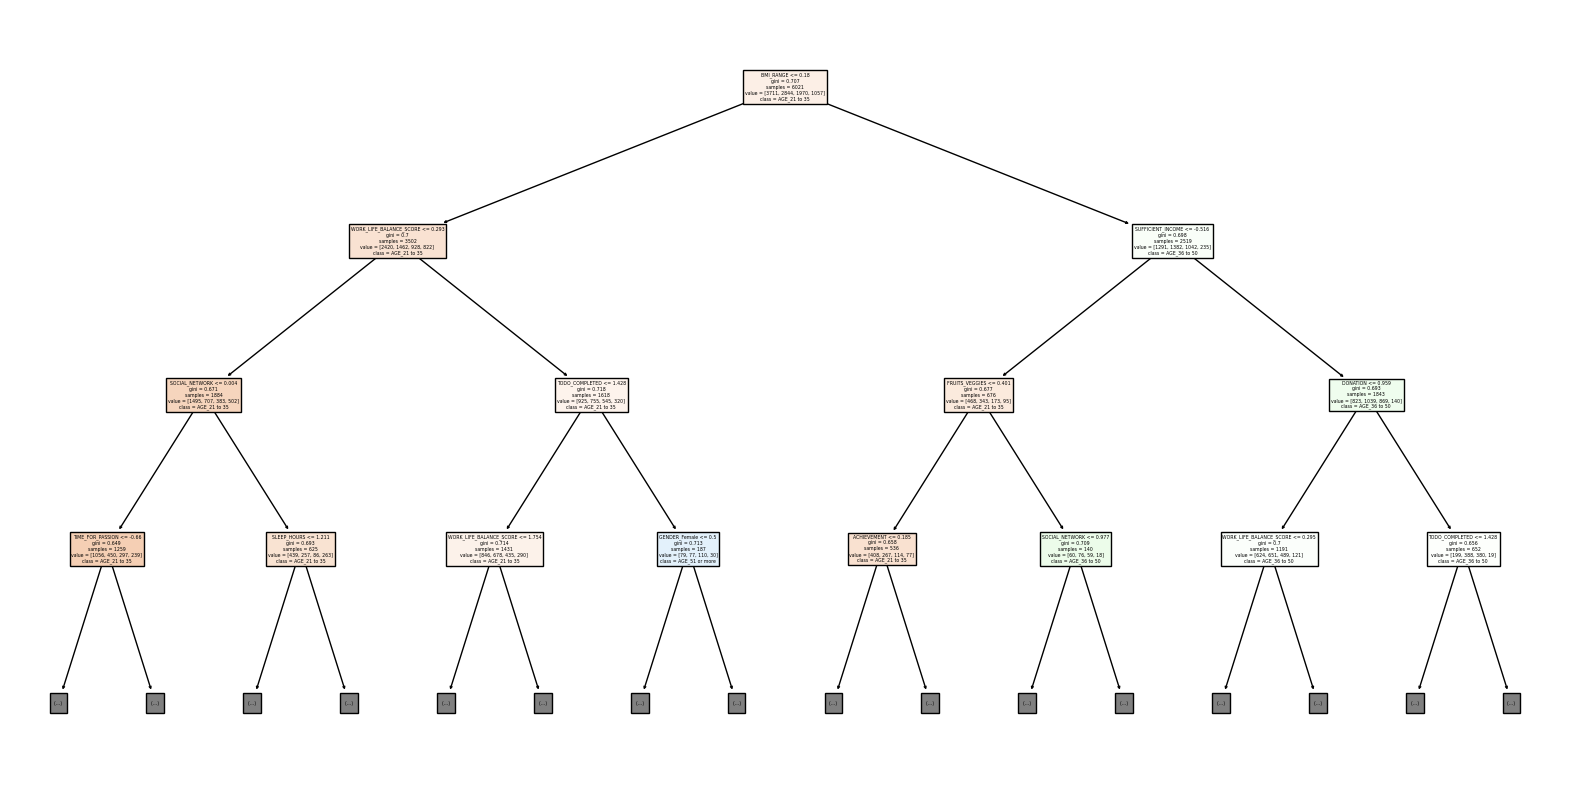

In [32]:
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], feature_names=X_train.columns, class_names=age_columns, filled=True, max_depth=3)

# 5. Neural Networks

In [44]:
# Reload the data
train_data = pd.read_csv("data_train.csv")
val_data = pd.read_csv("data_val.csv")
test_data = pd.read_csv("data_test.csv")

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Data preparation
X_train = train_data.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y_train = train_data['WORK_LIFE_BALANCE_SCORE']
X_val = val_data.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y_val = val_data['WORK_LIFE_BALANCE_SCORE']
X_test = test_data.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y_test = test_data['WORK_LIFE_BALANCE_SCORE']

# Model Building Function
def build_model(input_shape):
    # Initialize the neural net structure
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2), # Dropout layer for regularization
        Dense(64, activation='relu'),
        Dropout(0.2), # Another Dropout layer for regularization
        Dense(1) 
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='mse') 
    return model

# Training with Multiple Seeds
num_seeds = 10
all_scoresT_rmse = []
all_scoresV_rmse = []
all_scoresT_mae = []
all_scoresV_mae = []
all_scoresT_r2 = []
all_scoresV_r2 = []

for i in range(num_seeds):
    print(f"Training on seed {i}")
    tf.random.set_seed(i)
    model = build_model(X_train.shape[1])
    
    # Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
              callbacks=[early_stopping], verbose=1)  
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    all_scoresT_rmse.append(train_rmse)
    all_scoresV_rmse.append(val_rmse)
    all_scoresT_mae.append(train_mae)
    all_scoresV_mae.append(val_mae)
    all_scoresT_r2.append(train_r2)
    all_scoresV_r2.append(val_r2)

average_rmseT = np.mean(all_scoresT_rmse)
average_rmseV = np.mean(all_scoresV_rmse)
average_maeT = np.mean(all_scoresT_mae)
average_maeV = np.mean(all_scoresV_mae)
average_r2T = np.mean(all_scoresT_r2)
average_r2V = np.mean(all_scoresV_r2)

print(f"Average Training RMSE: {average_rmseT}")
print(f"Average Validation RMSE: {average_rmseV}")
print(f"Average Training MAE: {average_maeT}")
print(f"Average Validation MAE: {average_maeV}")
print(f"Average Training R²: {average_r2T}")
print(f"Average Validation R²: {average_r2V}")

Training on seed 0
Epoch 1/100
300/300 [==============================] - 0s 675us/step - loss: 0.1682 - val_loss: 0.0164
Epoch 2/100
300/300 [==============================] - 0s 512us/step - loss: 0.0545 - val_loss: 0.0176
Epoch 3/100
300/300 [==============================] - 0s 517us/step - loss: 0.0386 - val_loss: 0.0175
Epoch 4/100
300/300 [==============================] - 0s 503us/step - loss: 0.0305 - val_loss: 0.0121
Epoch 5/100
300/300 [==============================] - 0s 510us/step - loss: 0.0267 - val_loss: 0.0165
Epoch 6/100
300/300 [==============================] - 0s 529us/step - loss: 0.0245 - val_loss: 0.0344
Epoch 7/100
300/300 [==============================] - 0s 531us/step - loss: 0.0230 - val_loss: 0.0161
Epoch 8/100
300/300 [==============================] - 0s 533us/step - loss: 0.0220 - val_loss: 0.0370
Epoch 9/100
300/300 [==============================] - 0s 530us/step - loss: 0.0201 - val_loss: 0.0142
Epoch 10/100
300/300 [==============================] 

In [43]:
# Test set evaluation
y_test_pred = model.predict(X_test)

# Compute the relevant regression metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

100/100 [==============================] - 0s 314us/step
Test RMSE: 0.06873105378309567
Test MAE: 0.054318919019873825
Test R²: 0.9952375513264281
